<a href="https://colab.research.google.com/github/0encodedguy0/Text-Summarization-different-approaches/blob/main/Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 𝓣𝓮𝔁𝓽 𝓢𝓾𝓶𝓶𝓪𝓻𝓲𝔃𝓪𝓽𝓲𝓸𝓷


## Экстрактивная суммаризация


### Экстрактивная суммаризация на основе вхождения общих слов

In [ ]:
! pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 8.2 MB 56.9 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=3ac7dac728ecae6853e21a15c10173ca57d443b6231ec94a61c2ae74220ad7df
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [ ]:
import re
import pymorphy2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
def lemmatize(text):                                 # Лемматизация слов
    words = text.split() # разбиваем текст на слова
    res = list()
    for word in words:
        p = morph.parse(word)[0]
        res.append(p.normal_form)
    return res


def sentence_comparison(all_sentences):
  matrix_of_coefs = np.zeros((len(all_sentences), len(all_sentences)))
  for i in range(len(all_sentences)):
    for j in range(len(all_sentences)):
      counter = 0
      gen_length = 0
      if i < j:
        for word in all_sentences[i]:
          if word in all_sentences[j]:
            counter += 1
#            gen_length += len(word)
#        if gen_length != 0:
#          matrix_of_coefs[i][j] = (counter / gen_length)
        matrix_of_coefs[i][j] = (counter / (len(all_sentences[i]) + len(all_sentences[j])))
        matrix_of_coefs[j][i] = matrix_of_coefs[i][j]
#        else:
#          matrix_of_coefs[i][j] = 0
#          matrix_of_coefs[j][i] = matrix_of_coefs[i][j]
  ans_matrix = matrix_of_coefs.copy()
  i = 0
  j = 0
  while i < len(ans_matrix[0]):
    zeros_counter = 0
    while j < len(ans_matrix):
      if matrix_of_coefs[i][j] != 0:
        i += 1
        j = -1
        zeros_counter = 0
      else:
        zeros_counter += 1
      j += 1
      if zeros_counter == len(matrix_of_coefs[0]) - 1:
        ans_matrix = np.delete(ans_matrix, i, 0)
        ans_matrix = np.delete(ans_matrix, i, 1)
#      n_rows = len(ans_matrix)
#      for l in range(n_rows):
#        _ = ans_matrix[l].pop(i)
        i -= 1
    i += 1
  return matrix_of_coefs, ans_matrix


def print_graph(matrix_of_edges, array_of_labels):
    labels_with_dot = {}
    plt.rcParams["figure.figsize"] = (40,40)
    ax = plt.gca()
    ax.set_title('Общие слова в предложениях')
    for i in range(len(array_of_labels)):
        labels_with_dot[i] = float('%.2f' % array_of_labels[i])
    printing_graph = nx.Graph(matrix_of_edges)
    nx.draw(printing_graph, pos=nx.circular_layout(printing_graph), with_labels=False, ax=ax)
    nx.draw_networkx_labels(printing_graph, pos=nx.circular_layout(printing_graph),
                            labels=labels_with_dot, font_size=5)
    plt.show()
    return 0

In [ ]:
text = str(input()) # На вход подается текст

Концепция использования компьютеров для имитации разумного поведения и критического мышления была впервые описана Аланом Тьюрингом в 1950 году. В книге "Компьютеры и интеллект" Тьюринг описал простой тест, позже известный как "тест Тьюринга", чтобы определить, способны ли компьютеры к человеческому интеллекту. Шесть лет спустя Джон Маккарти описал термин "искусственный интеллект" (ИИ) как науку и технику создания интеллектуальных машин. ИИ начинался как простая серия правил "если-то" и в течение нескольких десятилетий развивался, включая все более сложные алгоритмы, работающие аналогично человеческому мозгу. В ИИ есть много технологий, похожих на медицинские специальности (таблица 1), такие как машинное обучение (machine learning, ML), глубокое обучение (deep learning, DL) и компьютерное зрение. Машинное обучение — это использование определенных признаков для выявления шаблонов, которые можно использовать для анализа конкретной ситуации. Машина может "учиться" и применять эту информаци

In [ ]:
text = re.sub(r'\([^)]*\)', '', text)
text = text.replace("ИИ", "искусственный интеллект")
sentences = text.split(".")
print(sentences)

['Концепция использования компьютеров для имитации разумного поведения и критического мышления была впервые описана Аланом Тьюрингом в 1950 году', ' В книге "Компьютеры и интеллект" Тьюринг описал простой тест, позже известный как "тест Тьюринга", чтобы определить, способны ли компьютеры к человеческому интеллекту', ' Шесть лет спустя Джон Маккарти описал термин "искусственный интеллект"  как науку и технику создания интеллектуальных машин', ' искусственный интеллект начинался как простая серия правил "если-то" и в течение нескольких десятилетий развивался, включая все более сложные алгоритмы, работающие аналогично человеческому мозгу', ' В искусственный интеллект есть много технологий, похожих на медицинские специальности , такие как машинное обучение , глубокое обучение  и компьютерное зрение', ' Машинное обучение — это использование определенных признаков для выявления шаблонов, которые можно использовать для анализа конкретной ситуации', ' Машина может "учиться" и применять эту инф

In [ ]:
lemmatized_text = []
for sentence in sentences:
  sentence = re.sub(r'[.,"\'-?:!;—%]', '', sentence)
  lemmatized_text.append(lemmatize(sentence))
print(lemmatized_text)

[['концепция', 'использование', 'компьютер', 'для', 'имитация', 'разумный', 'поведение', 'и', 'критический', 'мышление', 'быть', 'впервые', 'описать', 'алан', 'тьюринг', 'в', 'год'], ['в', 'книга', 'компьютер', 'и', 'интеллект', 'тьюринг', 'описать', 'простой', 'тест', 'поздний', 'известный', 'как', 'тест', 'тьюринг', 'чтобы', 'определить', 'способный', 'ли', 'компьютер', 'к', 'человеческий', 'интеллект'], ['шесть', 'год', 'спустя', 'джон', 'маккарти', 'описать', 'термин', 'искусственный', 'интеллект', 'как', 'наука', 'и', 'техника', 'создание', 'интеллектуальный', 'машина'], ['искусственный', 'интеллект', 'начинаться', 'как', 'простой', 'серия', 'правило', 'еслить', 'и', 'в', 'течение', 'несколько', 'десятилетие', 'развиваться', 'включая', 'всё', 'более', 'сложный', 'алгоритм', 'работать', 'аналогично', 'человеческий', 'мозг'], ['в', 'искусственный', 'интеллект', 'есть', 'много', 'технология', 'похожий', 'на', 'медицинский', 'специальность', 'такой', 'как', 'машинный', 'обучение', 'гл

In [ ]:
changed_text = (text + '.')[:-1]
changed_text = re.sub(r'[.,"\'-?:!;—%]', '', changed_text)
changed_text = lemmatize(changed_text)
unique = []
for word in changed_text:
  if word not in unique:
    unique.append(word)
unique.sort()
volume_of_dict = len(unique)

In [ ]:
matr, graph_in_matrix = sentence_comparison(lemmatized_text)
print(matr, graph_in_matrix)

[[0.         0.12820513 0.09090909 ... 0.05       0.05128205 0.        ]
 [0.12820513 0.         0.13157895 ... 0.08888889 0.04545455 0.        ]
 [0.09090909 0.13157895 0.         ... 0.07692308 0.02631579 0.        ]
 ...
 [0.05       0.08888889 0.07692308 ... 0.         0.02222222 0.        ]
 [0.05128205 0.04545455 0.02631579 ... 0.02222222 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] [[0.         0.12820513 0.09090909 ... 0.02702703 0.05       0.05128205]
 [0.12820513 0.         0.13157895 ... 0.04761905 0.08888889 0.04545455]
 [0.09090909 0.13157895 0.         ... 0.02777778 0.07692308 0.02631579]
 ...
 [0.02702703 0.04761905 0.02777778 ... 0.         0.09302326 0.0952381 ]
 [0.05       0.08888889 0.07692308 ... 0.09302326 0.         0.02222222]
 [0.05128205 0.04545455 0.02631579 ... 0.0952381  0.02222222 0.        ]]


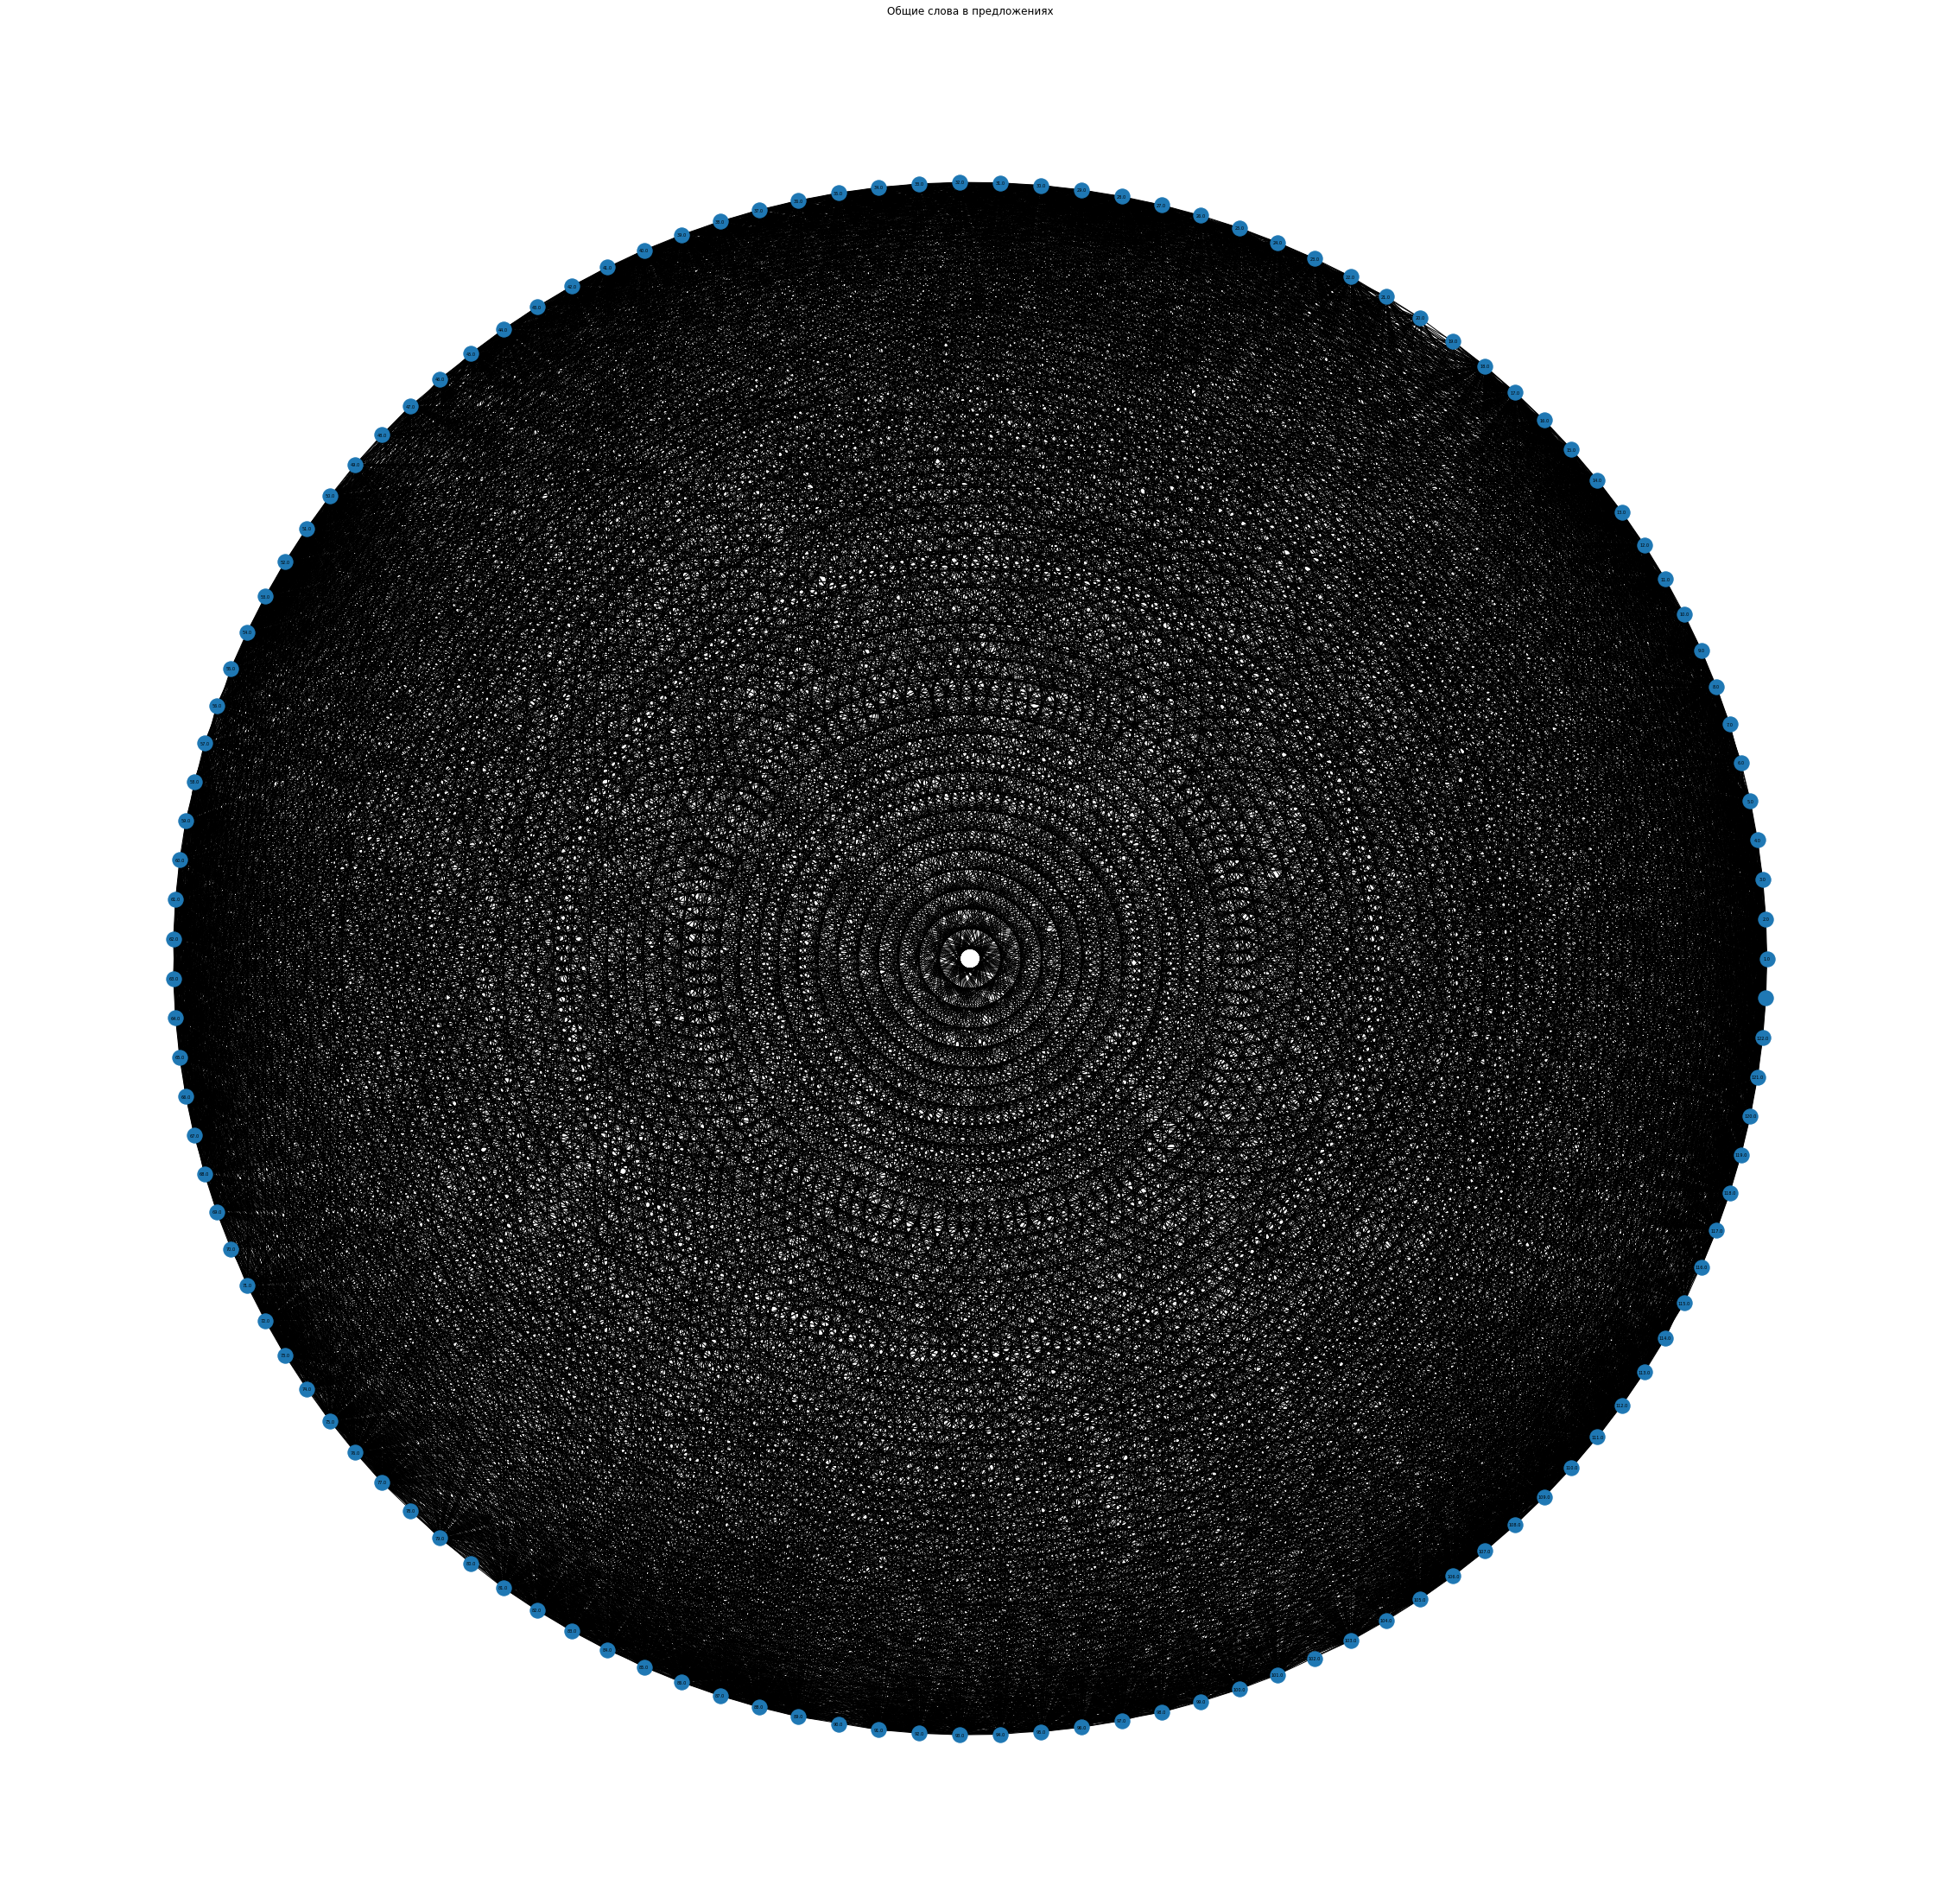

0

In [ ]:
matrix_of_edges = np.zeros((len(graph_in_matrix), len(graph_in_matrix)))
for i in range(len(graph_in_matrix)):
  for j in range(len(graph_in_matrix)):
    if graph_in_matrix[i][j] != 0:
      matrix_of_edges[i][j] = 1
labels = np.arange(1, len(graph_in_matrix))
print_graph(matrix_of_edges, labels)

In [ ]:
scores = [rate.mean() for rate in graph_in_matrix]
print(scores)
rating = {i+1: scores[i] for i in range(len(scores))}
print(rating)

[0.056014365204893904, 0.050689361448943156, 0.042880203654567475, 0.050431868274495875, 0.06657968818008414, 0.04057113144370217, 0.04738599260618466, 0.03030636016665941, 0.05605967006232834, 0.017016156532737768, 0.0801005424418262, 0.05181084407146234, 0.07865567213956103, 0.0477514066681827, 0.06286347018988542, 0.06643809591776845, 0.04103425066100546, 0.030682159534952996, 0.005271020985984428, 0.009626539864852186, 0.02301339165218455, 0.04442504016762489, 0.03311450366731583, 0.024413547096135146, 0.07022611531306085, 0.04269194525180762, 0.08241652597754441, 0.05809470754100215, 0.09241963357216515, 0.04838980311554286, 0.05802284677110457, 0.06078359423395511, 0.052086362567637386, 0.09249486773068369, 0.08463958321371012, 0.0644068284095051, 0.06220087606197587, 0.04275418726552753, 0.03827826094355564, 0.07133686190444112, 0.07080604497215169, 0.04264470768985536, 0.03131699668100039, 0.05557206507606595, 0.03618045524763394, 0.026608434659048896, 0.0266089610298072, 0.014

In [ ]:
sorted_rating = {}
sorted_keys = sorted(rating, key=rating.get)[::-1]
for key in sorted_keys:
  sorted_rating[key] = rating[key]
print(sorted_rating)

{34: 0.09249486773068369, 29: 0.09241963357216515, 35: 0.08463958321371012, 88: 0.08324991982639944, 27: 0.08241652597754441, 11: 0.0801005424418262, 13: 0.07865567213956103, 53: 0.075345597938385, 40: 0.07133686190444112, 63: 0.07087733992964727, 41: 0.07080604497215169, 25: 0.07022611531306085, 59: 0.06784278551585611, 112: 0.06658790619665818, 5: 0.06657968818008414, 16: 0.06643809591776845, 87: 0.06621866582308952, 72: 0.06619002553903211, 67: 0.06541666217787566, 36: 0.0644068284095051, 77: 0.0643519521230944, 107: 0.06338023413562884, 51: 0.06309516018537438, 15: 0.06286347018988542, 62: 0.06274461320026635, 50: 0.06244910690385781, 37: 0.06220087606197587, 32: 0.06078359423395511, 61: 0.060047386629776024, 86: 0.05964830852548969, 111: 0.058489885468150975, 28: 0.05809470754100215, 31: 0.05802284677110457, 82: 0.057044868240235684, 73: 0.05649117518247612, 114: 0.05626251180437491, 9: 0.05605967006232834, 1: 0.056014365204893904, 89: 0.055762607055711934, 44: 0.05557206507606595

In [ ]:
volume_of_summary = int(input()) # Указать количество предложений
best_keys = list(sorted_rating)[:volume_of_summary] # Номера лучших предложений
indexes_of_best_sentences = sorted(best_keys)
summary = ''
for index in indexes_of_best_sentences:
  summary += sentences[index-1]
  summary += '.'
print(summary)

10
 В этом обзоре представляется краткий исторический обзор появления искусственный интеллект в медицине и его хронологическая эволюция за последние полвека, включая его роль в гастроэнтерологии и эндоскопии. С появлением машинного обучения и глубокого обучения возможности применения искусственный интеллект в медицине расширились, включая перспективы для персонализированной медицины, а не основанной только на алгоритмах. Однако этот ранний период был важным временем для оцифровки данных, которые позже послужили основой для будущего роста и использования искусственный интеллект в медицине. Базы данных клинической информатики и системы медицинской документации также были впервые разработаны в это время и помогли заложить основу для будущих разработок искусственный интеллект в медицине. В 1973 году в Стэнфордском университете была создана компьютерная система с разделением времени "Медицинские эксперименты и искусственный интеллект в медицине", которая расширила сетевые возможности клинич

### Экстрактивная суммаризация на основе обученных векторных представлений

In [ ]:
import re
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from scipy import spatial

In [ ]:
text = str(input())

Концепция использования компьютеров для имитации разумного поведения и критического мышления была впервые описана Аланом Тьюрингом в 1950 году. В книге "Компьютеры и интеллект" Тьюринг описал простой тест, позже известный как "тест Тьюринга", чтобы определить, способны ли компьютеры к человеческому интеллекту. Шесть лет спустя Джон Маккарти описал термин "искусственный интеллект" (ИИ) как науку и технику создания интеллектуальных машин. ИИ начинался как простая серия правил "если-то" и в течение нескольких десятилетий развивался, включая все более сложные алгоритмы, работающие аналогично человеческому мозгу. В ИИ есть много технологий, похожих на медицинские специальности (таблица 1), такие как машинное обучение (machine learning, ML), глубокое обучение (deep learning, DL) и компьютерное зрение. Машинное обучение — это использование определенных признаков для выявления шаблонов, которые можно использовать для анализа конкретной ситуации. Машина может "учиться" и применять эту информаци

In [ ]:
all_words = re.sub(r'\([^)]*\)', '', text)
all_words = all_words.replace("ИИ", "искусственный интеллект")
all_words = re.sub(r'[,"\'-?:!;—%]', '', all_words)
all_words = all_words.split()
print(len(all_words), all_words)
changes = re.sub(r'\([^)]*\)', '', text)
changes = changes.replace("ИИ", "искусственный интеллект")
splitted_sentences = changes.split('.')
splitted_sentences = splitted_sentences[:-1]
sentences = []
for sentence in splitted_sentences:
  sentence = re.sub(r'[,"\'-?:!;—%]', '', sentence)
  sentences.append(sentence.split())
print(sentences)

2164 ['Концепция', 'использования', 'компьютеров', 'для', 'имитации', 'разумного', 'поведения', 'и', 'критического', 'мышления', 'была', 'впервые', 'описана', 'Аланом', 'Тьюрингом', 'в', 'году', 'В', 'книге', 'Компьютеры', 'и', 'интеллект', 'Тьюринг', 'описал', 'простой', 'тест', 'позже', 'известный', 'как', 'тест', 'Тьюринга', 'чтобы', 'определить', 'способны', 'ли', 'компьютеры', 'к', 'человеческому', 'интеллекту', 'Шесть', 'лет', 'спустя', 'Джон', 'Маккарти', 'описал', 'термин', 'искусственный', 'интеллект', 'как', 'науку', 'и', 'технику', 'создания', 'интеллектуальных', 'машин', 'искусственный', 'интеллект', 'начинался', 'как', 'простая', 'серия', 'правил', 'еслито', 'и', 'в', 'течение', 'нескольких', 'десятилетий', 'развивался', 'включая', 'все', 'более', 'сложные', 'алгоритмы', 'работающие', 'аналогично', 'человеческому', 'мозгу', 'В', 'искусственный', 'интеллект', 'есть', 'много', 'технологий', 'похожих', 'на', 'медицинские', 'специальности', 'такие', 'как', 'машинное', 'обучени

In [ ]:
unique = []
for word in all_words:
  if word not in unique:
    unique.append(word)
unique.sort()
print(len(unique))

1145


In [ ]:
model = Word2Vec(sentences, min_count=1)

In [ ]:
model.train(sentences, total_examples=model.corpus_count, epochs=10)

(18123, 21640)

In [ ]:
vocabulary = model.wv.vocab
print(len(vocabulary), vocabulary)

1145 {'Концепция': <gensim.models.keyedvectors.Vocab object at 0x7fb07e4db8d0>, 'использования': <gensim.models.keyedvectors.Vocab object at 0x7fb07e4db050>, 'компьютеров': <gensim.models.keyedvectors.Vocab object at 0x7fb07e4db550>, 'для': <gensim.models.keyedvectors.Vocab object at 0x7fb07e4dbd10>, 'имитации': <gensim.models.keyedvectors.Vocab object at 0x7fb07e4db690>, 'разумного': <gensim.models.keyedvectors.Vocab object at 0x7fb07eef5050>, 'поведения': <gensim.models.keyedvectors.Vocab object at 0x7fb07eef5b50>, 'и': <gensim.models.keyedvectors.Vocab object at 0x7fb07eef5cd0>, 'критического': <gensim.models.keyedvectors.Vocab object at 0x7fb07e4dbb10>, 'мышления': <gensim.models.keyedvectors.Vocab object at 0x7fb07eef5e90>, 'была': <gensim.models.keyedvectors.Vocab object at 0x7fb07eef5090>, 'впервые': <gensim.models.keyedvectors.Vocab object at 0x7fb07eef5990>, 'описана': <gensim.models.keyedvectors.Vocab object at 0x7fb07eef5390>, 'Аланом': <gensim.models.keyedvectors.Vocab obje

In [ ]:
word_vectors = []
for word in unique:
  word_vectors.append(model.wv[word])
word_vectors = np.array(word_vectors)
print(word_vectors, len(word_vectors))

[[ 3.7276368e-06 -3.9852713e-03 -2.7124898e-03 ... -3.6568055e-03
  -3.0724341e-03 -3.6271357e-03]
 [-2.9769556e-03 -4.6918308e-03 -2.9210281e-04 ... -2.5341755e-03
  -2.3708304e-03 -3.8077536e-03]
 [ 8.2482846e-04  2.0720821e-03 -4.4170786e-03 ...  1.9963596e-03
   1.8219670e-03  1.8097643e-03]
 ...
 [ 4.6912567e-03  1.0896288e-03  3.9021529e-03 ... -5.4228283e-03
   4.9169762e-03  4.7250660e-04]
 [ 4.8286938e-03  3.2440671e-03  3.9412621e-03 ... -7.9628004e-04
  -2.2904929e-03  4.6421555e-03]
 [ 1.2455280e-03 -1.4643911e-03  3.3317127e-03 ...  4.7393373e-04
   3.1540201e-03 -3.8029207e-03]] 1145


In [ ]:
words_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(word_vectors)
words_embedded_top = words_embedded[:1000]
print(words_embedded_top.shape)

(1000, 2)


In [ ]:
X = words_embedded_top[:, 0]
y = words_embedded_top[:, 1]

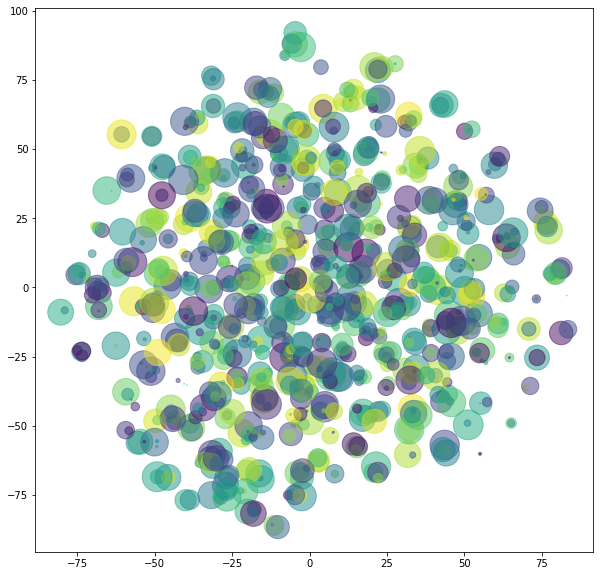

In [ ]:
colors = np.random.rand(len(words_embedded_top))
n = len(words_embedded_top)
area = (30 * np.random.rand(n))**2
plt.figure(num=1, figsize=(10, 10))
plt.scatter(X, y, s=area, c=colors, alpha=0.5)
plt.show()

In [ ]:
vectorized_sentences = []
for sentence in sentences:
  vectorized_sentence = []
  for word in sentence:
    if word not in vocabulary:
      vectorized_sentence.append(np.zeros(len(word_vectors[0])))
    else:
      vectorized_sentence.append(model.wv[word])
  vectorized_sentences.append(vectorized_sentence)

['Врачи', 'должны', 'рассматривать', 'это', 'не', 'как', 'противостояние', 'человекмашина', 'а', 'как', 'партнерство', 'в', 'целях', 'дальнейшего', 'улучшения', 'клинических', 'результатов', 'для', 'пациентов', 'с', 'желудочнокишечными', 'заболеваниями']


In [ ]:
sentences_vectors = []
for sentence in vectorized_sentences:
  sum_vectorized_words = np.zeros(len(word_vectors[0]))
  for word in sentence:
    sum_vectorized_words += word
  sentences_vectors.append(sum_vectorized_words / len(sentence))
print(len(sentences_vectors), sentences_vectors)

123 [array([ 5.05419411e-04,  1.11582737e-03,  2.08903789e-03,  2.09125336e-03,
        5.75250318e-04,  3.06958960e-03,  8.69035372e-04, -3.32904961e-03,
        3.11437127e-03, -1.50074785e-03, -3.28470192e-03,  2.38842842e-03,
       -1.23053879e-03, -1.05038240e-03, -1.17419876e-04,  4.28793123e-04,
        6.38270094e-03,  4.63656068e-05,  5.04292148e-04, -4.12751710e-04,
       -2.00957397e-03, -5.30662950e-04, -4.37172313e-03,  1.06234060e-03,
       -7.75560993e-04,  1.65786813e-03, -1.16907266e-03, -6.48838228e-06,
        1.63175809e-03,  1.46549148e-03,  1.24208399e-03, -4.69843220e-04,
       -4.71612017e-03, -3.73580361e-04,  2.23527076e-04, -1.14735307e-03,
       -1.76004749e-03,  9.24511301e-04,  2.40287604e-03,  7.95832715e-04,
       -1.82133458e-03,  1.69231833e-03, -1.08259720e-03,  1.33225579e-03,
        7.77753097e-05, -1.42259060e-03, -8.86407356e-04,  9.94520261e-04,
        1.80686629e-04, -7.38911834e-04,  1.63152745e-03, -8.66872527e-04,
       -4.13801077e-

In [ ]:
similarity_matrix = np.zeros((len(sentences_vectors), len(sentences_vectors)))

In [ ]:
for i in range(len(sentences_vectors)):
  for j in range(len(sentences_vectors)):
    if i < j:
      similarity_matrix[i][j] = 1 - spatial.distance.cosine(sentences_vectors[i], sentences_vectors[j])
      similarity_matrix[j][i] = similarity_matrix[i][j]
print(similarity_matrix)

[[0.         0.87799199 0.87027847 ... 0.88246924 0.90981607 0.89287129]
 [0.87799199 0.         0.85557014 ... 0.86944885 0.90727901 0.88278848]
 [0.87027847 0.85557014 0.         ... 0.86207034 0.90333568 0.87808823]
 ...
 [0.88246924 0.86944885 0.86207034 ... 0.         0.9264063  0.87087241]
 [0.90981607 0.90727901 0.90333568 ... 0.9264063  0.         0.90510154]
 [0.89287129 0.88278848 0.87808823 ... 0.87087241 0.90510154 0.        ]]


In [ ]:
matrix_of_edges = np.zeros((len(similarity_matrix), len(similarity_matrix)))
for i in range(len(similarity_matrix)):
  for j in range(len(similarity_matrix)):
    if similarity_matrix[i][j] != 0:
      matrix_of_edges[i][j] = 1
labels = np.arange(1, len(similarity_matrix))
print_graph(matrix_of_edges, labels)

In [ ]:
scores = [rate.mean() for rate in similarity_matrix]
print(scores)
rating = {i+1: scores[i] for i in range(len(scores))}
print(rating)

[0.8308093593627497, 0.8079717269293694, 0.8095029135296814, 0.8409686317581453, 0.8476500743642523, 0.8352413182319747, 0.8354460082256574, 0.838861089944347, 0.838842948247066, 0.7250076372070766, 0.8516832548305324, 0.8220285718907208, 0.857159754161942, 0.8309171452187362, 0.8589157253250915, 0.8462583732756839, 0.8160326444229792, 0.8008850592515349, 0.4623619979667658, 0.3446112704295974, 0.8030378731901722, 0.6962337348988563, 0.7679171699127181, 0.7763168937189632, 0.8490832774032698, 0.7898651121789771, 0.8616359045534198, 0.8497959101110739, 0.8701654397386391, 0.8284367617668182, 0.8417599902116034, 0.8374147151670709, 0.8318544170893696, 0.8689028262500658, 0.8470264250127425, 0.8376718923936826, 0.8363225860985637, 0.8278712640480432, 0.8149574610601487, 0.8480387493897642, 0.8031940284401119, 0.840628132690904, 0.7979429829206209, 0.8527313206843532, 0.722574771402077, 0.71153837202161, 0.776000182068676, 0.6900440915357856, 0.7084781229601846, 0.8393161949633646, 0.84983

In [ ]:
sorted_rating = {}
sorted_keys = sorted(rating, key=rating.get)[::-1]
for key in sorted_keys:
  sorted_rating[key] = rating[key]
print(sorted_rating)

{29: 0.8701654397386391, 34: 0.8689028262500658, 27: 0.8616359045534198, 105: 0.8614407229763277, 15: 0.8589157253250915, 111: 0.8574243189503337, 13: 0.857159754161942, 92: 0.8566240888371602, 87: 0.855345898869731, 107: 0.8551651109322, 88: 0.8530906775131735, 44: 0.8527313206843532, 98: 0.8527309828017526, 83: 0.8526351303934775, 62: 0.8525296898250851, 122: 0.8523747339365707, 53: 0.8521411766186147, 11: 0.8516832548305324, 103: 0.8516734159283019, 110: 0.8515170451006175, 119: 0.8504133188926891, 51: 0.8498310042265731, 28: 0.8497959101110739, 25: 0.8490832774032698, 40: 0.8480387493897642, 59: 0.8480241239899052, 5: 0.8476500743642523, 35: 0.8470264250127425, 54: 0.8468749963763895, 81: 0.8467209191646136, 16: 0.8462583732756839, 123: 0.846087989785226, 109: 0.8456611632980907, 72: 0.8451284460780155, 96: 0.8444068958029295, 73: 0.8441965026940262, 101: 0.8436749432607529, 66: 0.8431464368185709, 77: 0.8431363140440413, 106: 0.842395014867582, 31: 0.8417599902116034, 63: 0.841037

In [ ]:
texted = re.sub(r'\([^)]*\)', '', text)
sentences1 = texted.split(".")
volume_of_summary = int(input()) # Указать количество предложений
best_keys = list(sorted_rating)[:volume_of_summary] # Номера лучших предложений
indexes_of_best_sentences = sorted(best_keys)
summary = ''
for index in indexes_of_best_sentences:
  summary += sentences1[index-1]
  summary += '.'
print(summary)

10
 С появлением машинного обучения и глубокого обучения возможности применения ИИ в медицине расширились, включая перспективы для персонализированной медицины, а не основанной только на алгоритмах. ИИ может увеличить точность диагностики, эффективность рабочего процесса и клинических операций, облегчить мониторинг заболеваний и лечения, а также повысить точность процедур и общие результаты лечения пациентов. Однако этот ранний период был важным временем для оцифровки данных, которые позже послужили основой для будущего роста и использования ИИ в медицине. Базы данных клинической информатики и системы медицинской документации также были впервые разработаны в это время и помогли заложить основу для будущих разработок ИИ в медицине. В 1973 году в Стэнфордском университете была создана компьютерная система с разделением времени "Медицинские эксперименты и искусственный интеллект в медицине", которая расширила сетевые возможности клинических и биомедицинских исследователей из нескольких уч

## Абстрактивная суммаризация

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  Reviews.csv.zip
  inflating: Reviews.csv             


In [ ]:
!ls

Reviews.csv  sample_data


In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

logger = tf.get_logger()

class AttentionLayer(tf.keras.layers.Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Создаем обучаемую переменную веса для слоя

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Вычисление hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Функция шага для вычисления ci, используя ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Вычисляем выводы energy """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Вычисляем контекстные векторы """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Выводы слоя """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from tensorflow.keras.utils import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/Reviews.csv')

In [ ]:
data.drop_duplicates(subset=['Text'],inplace=True)  # удаление лубликатов
data.dropna(axis=0,inplace=True)  # удаление пропусков (nan)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393565 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      393565 non-null  int64 
 1   ProductId               393565 non-null  object
 2   UserId                  393565 non-null  object
 3   ProfileName             393565 non-null  object
 4   HelpfulnessNumerator    393565 non-null  int64 
 5   HelpfulnessDenominator  393565 non-null  int64 
 6   Score                   393565 non-null  int64 
 7   Time                    393565 non-null  int64 
 8   Summary                 393565 non-null  object
 9   Text                    393565 non-null  object
dtypes: int64(5), object(5)
memory usage: 33.0+ MB


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 # удаление коротких слов
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [ ]:
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t,0))
cleaned_text[:5]  

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [ ]:
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(text_cleaner(t,1))
cleaned_summary[:10]

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy',
 'nice taffy',
 'great just as good as the expensive brands',
 'wonderful tasty taffy',
 'yay barley',
 'healthy dog food']

In [ ]:
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary

In [ ]:
data.replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

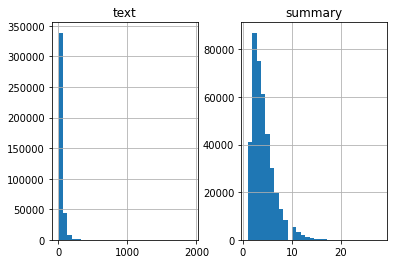

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# заполняем массивы длинами предложений
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [ ]:
cnt=0
for i in data['cleaned_summary']:
    if(len(i.split())<=10):
        cnt=cnt+1
print(cnt/len(data['cleaned_summary']))

0.9801405345194589


In [ ]:
cnt=0
for i in data['cleaned_text']:
    if(len(i.split())<=80):
        cnt=cnt+1
print(cnt/len(data['cleaned_text']))

0.9130318682240923


In [ ]:
max_text_len=80
max_summary_len=10

In [ ]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
for i in range(5):
    print("Статья:",df['text'][i])
    print("Резюме:",df['summary'][i])
    print("\n")

Статья: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Резюме: sostok good quality dog food eostok


Статья: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Резюме: sostok not as advertised eostok


Статья: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
Резюме: sostok delight says it all eostok


Статья: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Резюме: sostok cough medicine eostok


Статья: great taffy great price wide assortment yummy taffy delivery quick taffy lover deal

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.05,random_state=0,shuffle=True) 

In [ ]:
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% редких слов в словаре:",(cnt/tot_cnt)*100)
print("Общий процент редких слов:",(freq/tot_freq)*100)

% редких слов в словаре: 67.98872558888665
Общий процент редких слов: 0.8628139196498984


In [ ]:
# подготовка токенайзера для статей на тренировочных данных
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

# конвертация последовательностей предложений в последовательности целых чисел
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# заполнение от нуля до максимальной длины
x_tr = pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

# размер словаря
x_voc = x_tokenizer.num_words + 1

print("Размер словаря X = {}".format(x_voc))

Размер словаря X = 30211


In [ ]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% редких слов в словаре:",(cnt/tot_cnt)*100)
print("Общий процент редких слов:",(freq/tot_freq)*100)

% редких слов в словаре: 74.62702066530514
Общий процент редких слов: 1.8678335178852608


In [ ]:
# подготовка токенайзера для резюме на тренировочных данных
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

# конвертация последовательностей предложений в последовательности целых чисел
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

# заполнение от нуля до максимальной длины
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

# размер словаря
y_voc = y_tokenizer.num_words +1

In [ ]:
y_tokenizer.word_counts['sostok'],len(y_tr)

(335882, 335882)

In [ ]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [ ]:
from keras import backend as K 
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 80, 100)      3021100     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 80, 300),    481200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2), 
      ModelCheckpoint('./MyModel_tf',monitor='val_loss', verbose=1,
                      save_best_only=True, mode='min', save_weights_only = False)]

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=15,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/15
650/650 [==============================] - ETA: 0s - loss: 2.6161
Epoch 1: val_loss improved from inf to 2.32771, saving model to ./MyModel_tf
650/650 [==============================] - 799s 1s/step - loss: 2.6161 - val_loss: 2.3277
Epoch 2/15
650/650 [==============================] - ETA: 0s - loss: 2.2279
Epoch 2: val_loss improved from 2.32771 to 2.10530, saving model to ./MyModel_tf
650/650 [==============================] - 769s 1s/step - loss: 2.2279 - val_loss: 2.1053
Epoch 3/15
650/650 [==============================] - ETA: 0s - loss: 2.0696
Epoch 3: val_loss improved from 2.10530 to 1.99711, saving model to ./MyModel_tf
650/650 [==============================] - 760s 1s/step - loss: 2.0696 - val_loss: 1.9971
Epoch 4/15
650/650 [==============================] - ETA: 0s - loss: 1.9753
Epoch 4: val_loss improved from 1.99711 to 1.93190, saving model to ./MyModel_tf
650/650 [==============================] - 760s 1s/step - loss: 1.9753 - val_loss: 1.9319
Epoch 5/15
6

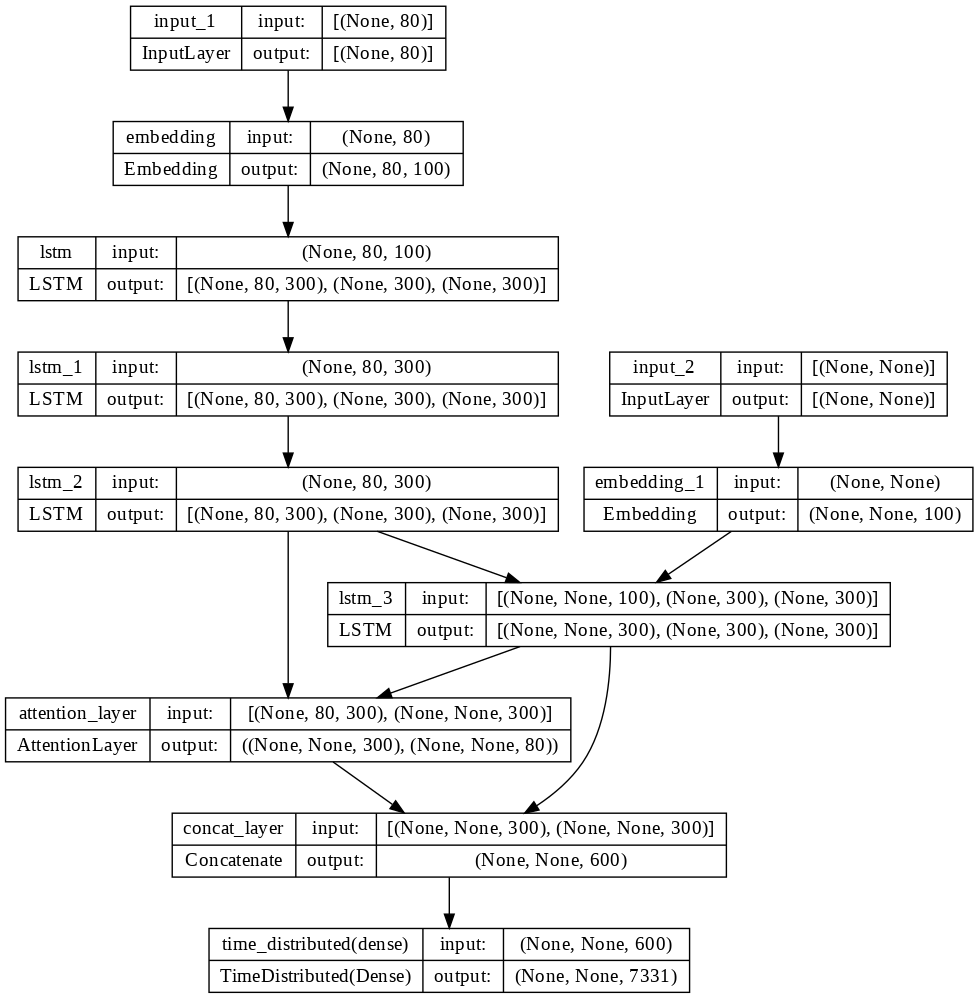

In [ ]:
# визуализация модели
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True,dpi=100)

In [ ]:
# записать модель в json
model_json = model.to_json()
with open("summary.json", "w") as json_file:
    json_file.write(model_json)
# записать веса в HDF5
model.save_weights("summary.h5")
print("Model saved")

Model saved


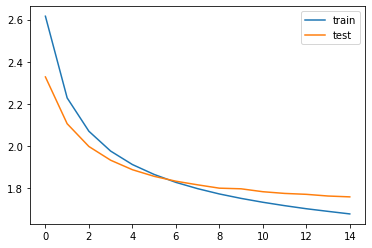

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,100):
    print("Статья:",seq2text(x_tr[i]))
    print("Оригинальное резюме:",seq2summary(y_tr[i]))
    print("Предсказанное резюме:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Статья: happy purchase product excellent quality price fantastic get stock 
Оригинальное резюме: great value 
1/1 [==============================] - 0s 17ms/step
Предсказанное резюме:  excellent product


Статья: coffee right like bold one cup morning gets going keeps going day 
Оригинальное резюме: great coffee 
1/1 [==============================] - 0s 15ms/step
Предсказанное резюме:  great coffee


Статья: years favorite cracker keebler clubs one day saw multi grain version thought would give try especially since normally enjoy whole grain breads trying lower cholesterol could believe multi grain version actually tastes better original bought several boxes crackers always make sure hand use asian tuna salad inglehoffer sweet honey mustard spreads soups tasty crackers 
Оригинальное резюме: better than the original 
1/1 [==============================] - 0s 18ms/step
Предсказанное резюме:  best graham crackers ever


Статья: fantastic product use every day power drink meal replacement